In [1]:
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore',message='^internal gelsd')

In [3]:
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\Abhi-iNeuron Internship\Mayur- Internship-South-German-Bank-Credit-Risk-main\Internship-South-German-Bank-Credit-Risk-main\SouthGermanCredit\SouthGermanCredit.asc",sep=' ')
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [4]:
df=df.rename(columns={'laufkont':'status', 'laufzeit':'duration', 'moral':'credit_history', 'verw':'purpose', 
                      'hoehe':'amount', 'sparkont':'savings', 'beszeit':'employment_duration', 'rate':'installment_rate',
                      'famges':'personal_status_sex', 'buerge':'other_debtors', 'wohnzeit':'present_residence',
                      'verm':'property', 'alter':'age', 'weitkred':'other_installment_plans', 'wohn':'housing',
                      'bishkred':'number_credits', 'beruf':'job', 'pers':'people_liable', 'telef':'telephone',
                      'gastarb':'foreign_worker', 'kredit':'credit_risk'})

In [5]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [8]:
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [19]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != "O"]

In [20]:
numerical_feature

['status',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex',
 'other_debtors',
 'present_residence',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'number_credits',
 'job',
 'people_liable',
 'telephone',
 'foreign_worker',
 'credit_risk']

In [11]:
for feature in numerical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is status and number of categories are 4
The feature is duration and number of categories are 33
The feature is credit_history and number of categories are 5
The feature is purpose and number of categories are 10
The feature is amount and number of categories are 923
The feature is savings and number of categories are 5
The feature is employment_duration and number of categories are 5
The feature is installment_rate and number of categories are 4
The feature is personal_status_sex and number of categories are 4
The feature is other_debtors and number of categories are 3
The feature is present_residence and number of categories are 4
The feature is property and number of categories are 4
The feature is age and number of categories are 53
The feature is other_installment_plans and number of categories are 3
The feature is housing and number of categories are 3
The feature is number_credits and number of categories are 4
The feature is job and number of categories are 4
The fe

In [17]:
discrete_variable=[feature for feature in numerical_feature if len(df[feature].unique())<9]

In [18]:
discrete_variable

['status',
 'credit_history',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex',
 'other_debtors',
 'present_residence',
 'property',
 'other_installment_plans',
 'housing',
 'number_credits',
 'job',
 'people_liable',
 'telephone',
 'foreign_worker',
 'credit_risk']

In [14]:
continous_variable=[feature for feature in numerical_feature if feature not in df[discrete_variable]]

In [21]:
continous_variable

['duration', 'purpose', 'amount', 'age']

In [22]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

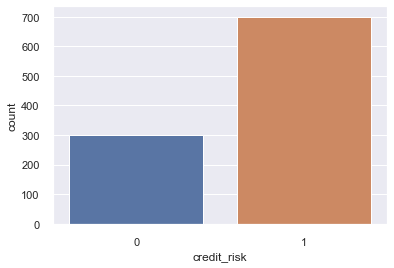

In [23]:
sns.set_theme(style='darkgrid')
sns.countplot(x='credit_risk',data=df)

<AxesSubplot:xlabel='foreign_worker', ylabel='count'>

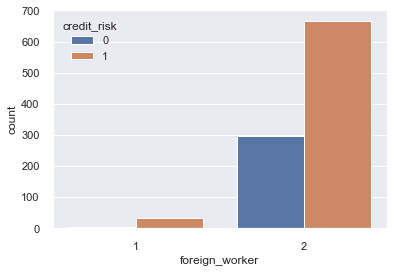

In [24]:
sns.set_theme(style='darkgrid')
sns.countplot(x='foreign_worker',hue='credit_risk',data=df)

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

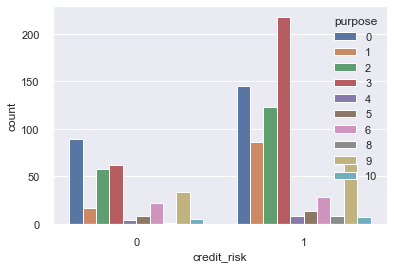

In [25]:
sns.set_theme(style='darkgrid')
sns.countplot(x='credit_risk',hue='purpose',data=df)

(array([ 81., 211., 153., 123.,  91.,  79.,  46.,  32.,  19.,  30.,  27.,
         23.,  18.,  11.,   9.,   6.,   7.,   6.,   4.,   5.,   5.,   1.,
          3.,   4.,   1.,   4.,   0.,   0.,   0.,   1.]),
 array([  250. ,   855.8,  1461.6,  2067.4,  2673.2,  3279. ,  3884.8,
         4490.6,  5096.4,  5702.2,  6308. ,  6913.8,  7519.6,  8125.4,
         8731.2,  9337. ,  9942.8, 10548.6, 11154.4, 11760.2, 12366. ,
        12971.8, 13577.6, 14183.4, 14789.2, 15395. , 16000.8, 16606.6,
        17212.4, 17818.2, 18424. ]),
 <BarContainer object of 30 artists>)

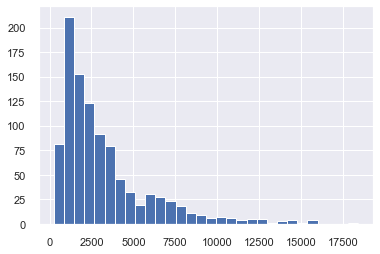

In [26]:
plt.hist(x='amount',bins=30,data=df)

In [27]:
df[df['credit_risk']==0]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
22,2,36,2,5,2384,1,2,4,3,1,1,4,33,3,1,1,2,2,1,2,0
45,1,18,2,0,1216,1,2,4,2,1,3,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,2,1,30,3,2,2,3,2,1,2,0
97,2,36,3,9,4455,1,3,2,1,1,2,1,30,2,2,2,4,2,2,2,0
110,1,15,2,0,3959,1,3,3,2,1,2,2,29,3,2,1,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


Text(0.5, 1.0, 'Bad Loans Amount Histogram')

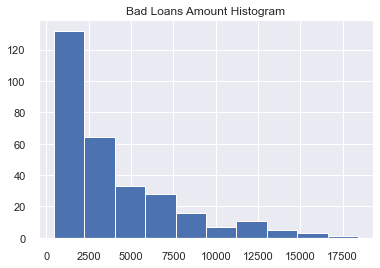

In [28]:
plt.hist(data=df[df['credit_risk']==0],x='amount')
plt.title('Bad Loans Amount Histogram')

In [36]:
max(df[df['credit_risk']==0]['amount'])


18424

In [37]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1

<Figure size 1800x1800 with 0 Axes>

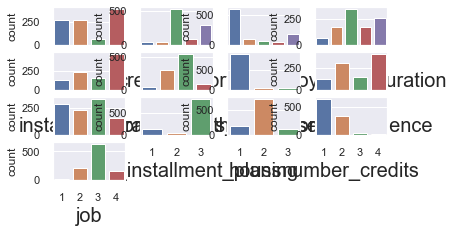

<Figure size 720x720 with 0 Axes>

In [34]:
for i in discrete_variable:
    # There Are 17 Feature In Discrete Variable
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.countplot(x=i,data=df[discrete_variable])
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
plt.show()

plt.figure(figsize=(10,10))
plotnumber = 1

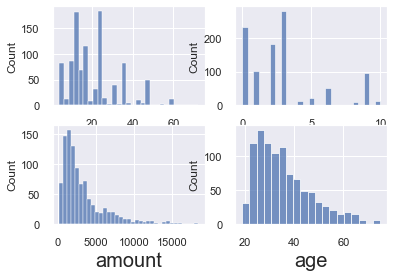

In [33]:
for i in continous_variable:
    # There Are 4 Feature In Continous Variable
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(x=i,data=df[continous_variable])
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
plt.show()

In [38]:
df.to_csv(r'C:\Users\Abhijeet\Desktop\Abhi-iNeuron Internship\Mayur- Internship-South-German-Bank-Credit-Risk-main\Internship-South-German-Bank-Credit-Risk-main\SouthGermanCredit\Preprocessed.csv')


In [39]:
from imblearn.over_sampling import ADASYN
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import pickle

In [40]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore')

In [41]:
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\Abhi-iNeuron Internship\Mayur- Internship-South-German-Bank-Credit-Risk-main\Internship-South-German-Bank-Credit-Risk-main\SouthGermanCredit\Preprocessed.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [42]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [43]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

In [44]:
((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

status                       0
duration                    70
credit_history               0
purpose                    118
amount                      72
savings                      0
employment_duration          0
installment_rate             0
personal_status_sex          0
other_debtors               93
present_residence            0
property                     0
age                         23
other_installment_plans    186
housing                    286
number_credits               6
job                        370
people_liable              155
telephone                    0
foreign_worker              37
credit_risk                  0
dtype: int64

In [45]:
columns=['duration','purpose','amount','other_debtors','age','other_installment_plans','housing','number_credits','job',
        'people_liable','foreign_worker']
for i in columns:
    q75,q25=np.percentile(df[i],[75,25])
    iqr=q75 - q25
    minimum = q25 - 1.5*iqr
    maximum = q75 + 1.5*iqr
    df.loc[df[i] < minimum, i] = minimum
    df.loc[df[i] > maximum, i] = maximum

In [46]:
((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [47]:
df.skew()

status                     0.006957
duration                   0.625672
credit_history            -0.011886
purpose                    0.488335
amount                     1.028761
savings                    1.016677
employment_duration       -0.117615
installment_rate          -0.531348
personal_status_sex       -0.305146
other_debtors              0.000000
present_residence         -0.272570
property                   0.045673
age                        0.906997
other_installment_plans    0.000000
housing                    0.000000
number_credits             1.098240
job                        0.000000
people_liable              0.000000
telephone                  0.391868
foreign_worker             0.000000
credit_risk               -0.874183
dtype: float64

In [48]:
col=['amount','savings','number_credits']
for i in col:
    df[i]=np.log(df[i]+1)

In [49]:
df.skew()

status                     0.006957
duration                   0.625672
credit_history            -0.011886
purpose                    0.488335
amount                    -0.092265
savings                    0.832475
employment_duration       -0.117615
installment_rate          -0.531348
personal_status_sex       -0.305146
other_debtors              0.000000
present_residence         -0.272570
property                   0.045673
age                        0.906997
other_installment_plans    0.000000
housing                    0.000000
number_credits             0.824755
job                        0.000000
people_liable              0.000000
telephone                  0.391868
foreign_worker             0.000000
credit_risk               -0.874183
dtype: float64

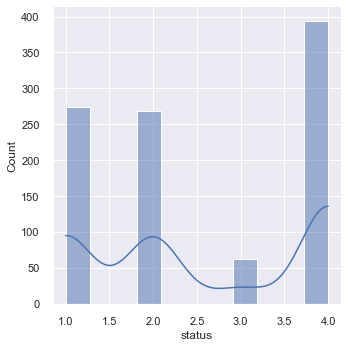

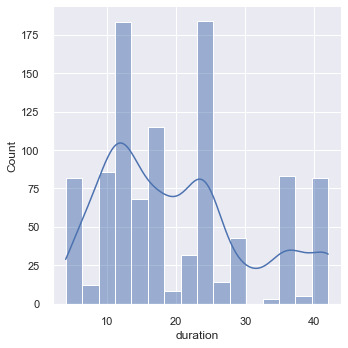

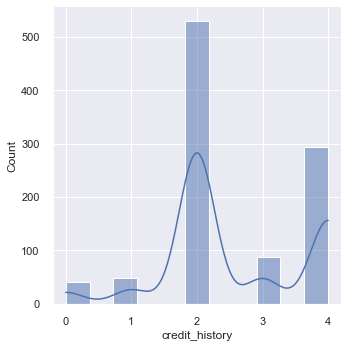

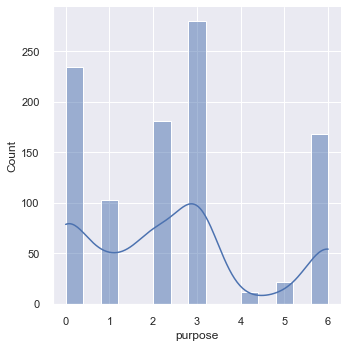

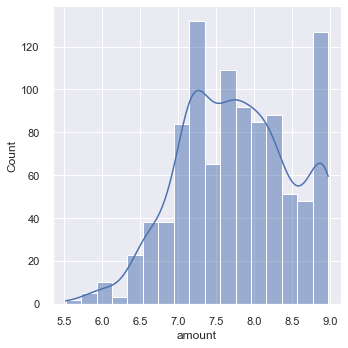

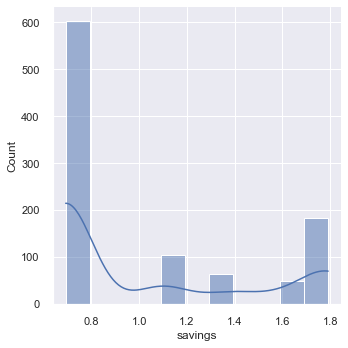

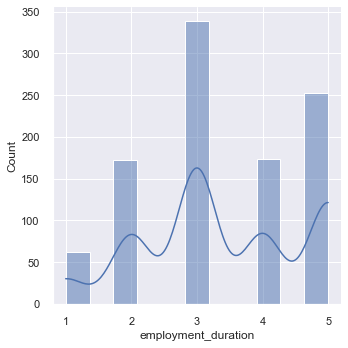

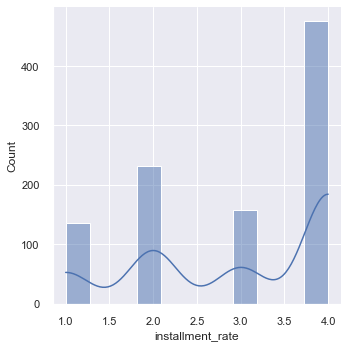

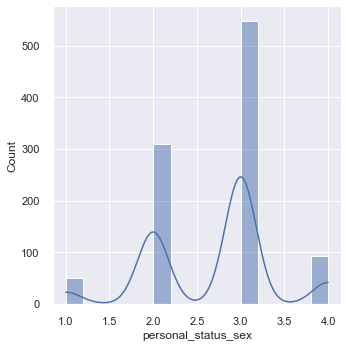

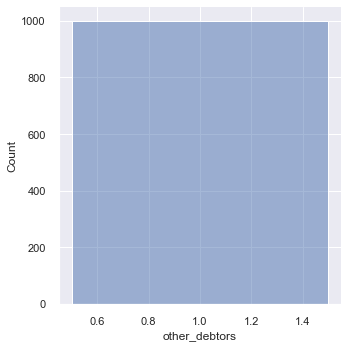

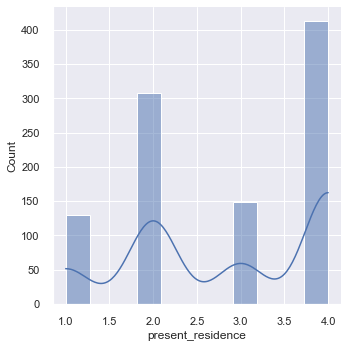

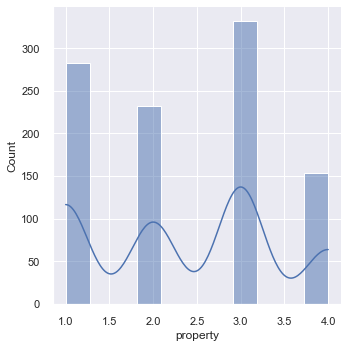

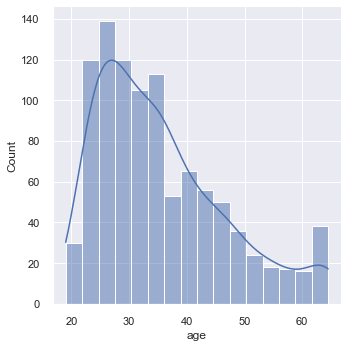

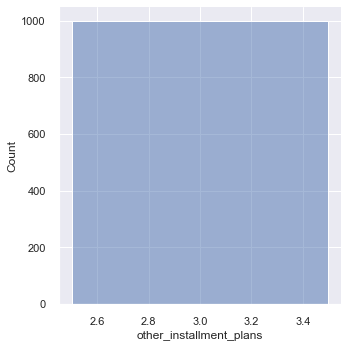

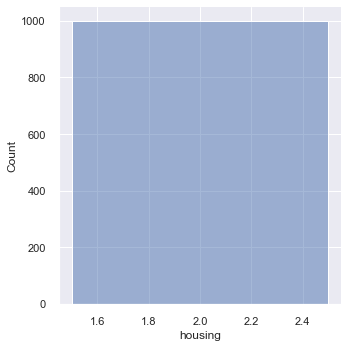

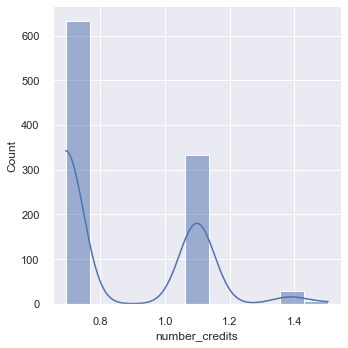

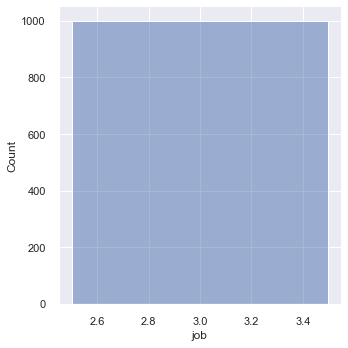

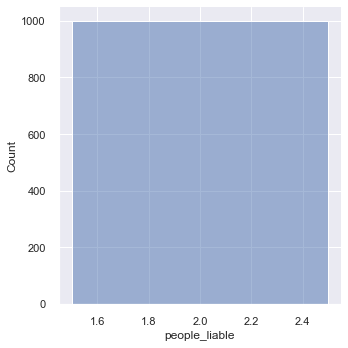

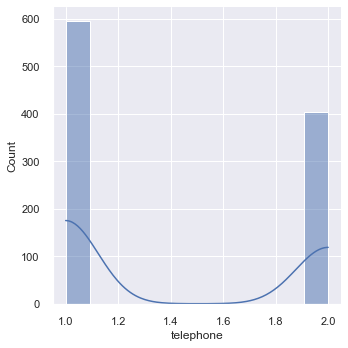

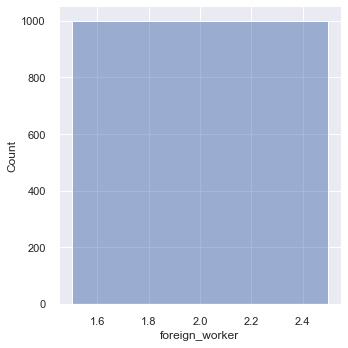

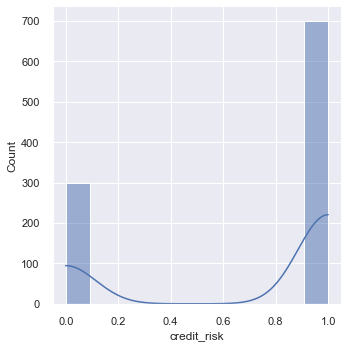

In [50]:
for i in df.columns:
    sns.displot(data=df,x=i,kde=True)

In [51]:
del df['other_debtors']
del df['other_installment_plans']
del df['housing']
del df['job']
del df['people_liable']
del df['foreign_worker']

In [52]:
scaling = [feature for feature in df.columns if feature not in ['credit_risk']]

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[scaling])

StandardScaler()

In [54]:
scaler.transform(df[scaling])

array([[-1.25456565, -0.21743962,  1.34401408, ..., -1.30441307,
        -0.73657304, -0.82331789],
       [-1.25456565, -1.0657086 ,  1.34401408, ...,  0.0496958 ,
         1.13829638, -0.82331789],
       [-0.45902624, -0.78295227, -0.50342796, ..., -1.12386522,
        -0.73657304, -0.82331789],
       ...,
       [ 1.13205258,  0.06531671,  1.34401408, ..., -0.49194775,
        -0.73657304,  1.21459768],
       [-0.45902624, -0.78295227, -0.50342796, ...,  1.49407859,
        -0.73657304,  1.21459768],
       [-1.25456565,  0.91358569, -0.50342796, ..., -0.40167383,
        -0.73657304, -0.82331789]])

In [55]:
df2=pd.DataFrame(scaler.transform(df[scaling]),columns=df[scaling].columns)

In [56]:
final=pd.concat([df[['credit_risk']].reset_index(drop=True),df2],axis=1)
final.head()

,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,number_credits,telephone
0,1,-1.254566,-0.217440,1.344014,-0.234588,-1.103856,-0.740466,-1.145978,0.918477,-0.963650,1.046987,-0.341055,-1.304413,-0.736573,-0.823318
1,1,-1.254566,-1.065709,1.344014,-1.230716,0.231565,-0.740466,-0.317959,-0.870183,0.449326,-0.765977,-1.293723,0.049696,1.138296,-0.823318
2,1,-0.459026,-0.782952,-0.503428,1.757667,-1.404433,0.168067,0.510060,-0.870183,-0.963650,1.046987,-1.293723,-1.123865,-0.736573,-0.823318
3,1,-1.254566,-0.782952,1.344014,-1.230716,-0.145290,-0.740466,-0.317959,0.024147,0.449326,-0.765977,-1.293723,0.320518,1.138296,-0.823318
4,1,-1.254566,-0.782952,1.344014,-1.230716,-0.114223,-0.740466,-0.317959,0.918477,0.449326,1.046987,-0.341055,0.230244,1.138296,-0.823318


In [57]:
final.to_csv(r'C:\Users\Abhijeet\Desktop\Abhi-iNeuron Internship\Mayur- Internship-South-German-Bank-Credit-Risk-main\Internship-South-German-Bank-Credit-Risk-main\SouthGermanCredit\Final_Model_Accomplished.csv')


In [58]:
file = 'Scaler_Credit_Bank_Data.pkl'

pickle.dump(scaler,open(file,'wb'))

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import ADASYN
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from collections import Counter
from scipy.stats import randint
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import warnings
import pickle

In [60]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\Abhi-iNeuron Internship\Mayur- Internship-South-German-Bank-Credit-Risk-main\Internship-South-German-Bank-Credit-Risk-main\SouthGermanCredit\Final_Model_Accomplished.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [62]:
df.head()

,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,number_credits,telephone
0,1,-1.254566,-0.217440,1.344014,-0.234588,-1.103856,-0.740466,-1.145978,0.918477,-0.963650,1.046987,-0.341055,-1.304413,-0.736573,-0.823318
1,1,-1.254566,-1.065709,1.344014,-1.230716,0.231565,-0.740466,-0.317959,-0.870183,0.449326,-0.765977,-1.293723,0.049696,1.138296,-0.823318
2,1,-0.459026,-0.782952,-0.503428,1.757667,-1.404433,0.168067,0.510060,-0.870183,-0.963650,1.046987,-1.293723,-1.123865,-0.736573,-0.823318
3,1,-1.254566,-0.782952,1.344014,-1.230716,-0.145290,-0.740466,-0.317959,0.024147,0.449326,-0.765977,-1.293723,0.320518,1.138296,-0.823318
4,1,-1.254566,-0.782952,1.344014,-1.230716,-0.114223,-0.740466,-0.317959,0.918477,0.449326,1.046987,-0.341055,0.230244,1.138296,-0.823318


In [63]:
X=df.drop(['credit_risk'],axis=1)
y=df['credit_risk']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
def model(X=X_train, y=y_train):
    
    models=[]
    models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
    models.append(('XGBClassifier',XGBClassifier(eval_metric='mlogloss')))
    models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
    models.append(('RandomForestClassifier',RandomForestClassifier()))
    models.append(('AdaBoostClassifier',AdaBoostClassifier()))
    models.append(('LogisticRegression',LogisticRegression()))
    models.append(('BaggingClassifier',BaggingClassifier()))
    models.append(('LGBMClassifier',LGBMClassifier()))
    models.append(('SGDClassifier',SGDClassifier()))
    models.append(('SVC',SVC()))
    
    results =[]
    names   =[]
    scoring ='accuracy'
    
    for name, model in models:
        #kfold = KFold(n_splits=10, random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10, random_state=42, n_repeats=3)
        cross = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cross)
        names.append(name)
        print (f'Model:{name},Mean: {cross.mean()},Std Dev: {cross.std()}')
        print('---'*25)

model(X_train,y_train)

Model:GradientBoostingClassifier,Mean: 0.7662499999999999,Std Dev: 0.04734074179111829
---------------------------------------------------------------------------
Model:XGBClassifier,Mean: 0.75,Std Dev: 0.0484122918275927
---------------------------------------------------------------------------
Model:DecisionTreeClassifier,Mean: 0.695,Std Dev: 0.06094738167742183
---------------------------------------------------------------------------
Model:RandomForestClassifier,Mean: 0.7550000000000002,Std Dev: 0.039869579046352285
---------------------------------------------------------------------------
Model:AdaBoostClassifier,Mean: 0.7595833333333333,Std Dev: 0.03773307199556142
---------------------------------------------------------------------------
Model:LogisticRegression,Mean: 0.7604166666666667,Std Dev: 0.040192678299522284
---------------------------------------------------------------------------
Model:BaggingClassifier,Mean: 0.7470833333333334,Std Dev: 0.04141800802656846
-------

In [67]:
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(X_train,y_train)
Counter(y_res)

Counter({1: 562, 0: 575})

In [68]:
model(X_res,y_res)

Model:GradientBoostingClassifier,Mean: 0.823236557470372,Std Dev: 0.03486478711311327
---------------------------------------------------------------------------
Model:XGBClassifier,Mean: 0.8311494074419085,Std Dev: 0.031994446383129
---------------------------------------------------------------------------
Model:DecisionTreeClassifier,Mean: 0.7613595197433111,Std Dev: 0.04040986121636698
---------------------------------------------------------------------------
Model:RandomForestClassifier,Mean: 0.847849712777519,Std Dev: 0.029916301973814837
---------------------------------------------------------------------------
Model:AdaBoostClassifier,Mean: 0.7938984629715883,Std Dev: 0.03896871758233318
---------------------------------------------------------------------------
Model:LogisticRegression,Mean: 0.7183020234953165,Std Dev: 0.0314257596972927
---------------------------------------------------------------------------
Model:BaggingClassifier,Mean: 0.7956864876054442,Std Dev: 0.034

In [69]:
param_distribs = {'n_estimators': randint(low=1, high=500),
                  'max_depth': randint(low=1, high=10),
                  'max_features':randint(low=1,high=10),
                 }

In [70]:
rnd_RF = RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_distribs,n_iter=10,cv=5,scoring='accuracy', 
                            random_state=42)


In [71]:
rnd_RF.fit(X_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027DF17DC3A0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027DED1FF580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027DF17DC8E0>},
                   random_state=42, scoring='accuracy')

In [72]:
rnd_RF.best_params_

{'max_depth': 8, 'max_features': 6, 'n_estimators': 386}

In [73]:
RFClassifier = RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386, random_state=42)
RFClassifier.fit(X_res,y_res)

RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386,
                       random_state=42)

In [74]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]

In [75]:
grid_xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid=param_grid, cv=5, scoring='accuracy', 
                        return_train_score=True)

In [76]:
grid_xgb.fit(X_res,y_res)
grid_xgb.best_params_

{'booster': 'gbtree', 'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 30}

In [77]:
XGClassifier=XGBClassifier(booster='gbtree', learning_rate=0.5, max_depth=8, n_estimators=30, eval_metric='mlogloss')
XGClassifier.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [78]:
BClassifier = BaggingClassifier(base_estimator=XGBClassifier(eval_metric='mlogloss'),random_state=42)
BClassifier.fit(X_res,y_res)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric='mlogloss',
                                               gamma=None, gpu_id=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=None,
                                               reg_alpha=None, reg_lambda=None, ...),
                  random_state=42)

In [79]:
LGBClassifier=LGBMClassifier(random_state=42)
LGBClassifier.fit(X_res,y_res)

LGBMClassifier(random_state=42)

In [80]:
GBClassifier=GradientBoostingClassifier(random_state=42)
GBClassifier.fit(X_res,y_res)

GradientBoostingClassifier(random_state=42)

In [81]:
prediction_RF = RFClassifier.predict(X_test)

prediction_XGB = XGClassifier.predict(X_test)

prediction_Bagg = BClassifier.predict(X_test)

prediction_LGBM = LGBClassifier.predict(X_test)

prediction_GB = GBClassifier.predict(X_test)

In [82]:

print('Accuracy RForest...{}'.format(accuracy_score(y_test,prediction_RF)))
print('---'*25)
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,prediction_XGB)))
print('---'*25)
print('Accuracy Bagging...{}'.format(accuracy_score(y_test,prediction_Bagg)))
print('---'*25)
print('Accuracy LightGBM...{}'.format(accuracy_score(y_test,prediction_LGBM)))
print('---'*25)
print('Accuracy Gradient...{}'.format(accuracy_score(y_test,prediction_GB)))
print('---'*25)

Accuracy RForest...0.76
---------------------------------------------------------------------------
Accuracy XGBoost...0.75
---------------------------------------------------------------------------
Accuracy Bagging...0.745
---------------------------------------------------------------------------
Accuracy LightGBM...0.745
---------------------------------------------------------------------------
Accuracy Gradient...0.755
---------------------------------------------------------------------------


In [83]:
print('Precision RForest...{}'.format(precision_score(y_test,prediction_RF)))
print('---'*25)
print('Precision XGBoost...{}'.format(precision_score(y_test,prediction_XGB)))
print('---'*25)
print('Precision Bagging...{}'.format(precision_score(y_test,prediction_Bagg)))
print('---'*25)
print('Precision LightGBM...{}'.format(precision_score(y_test,prediction_LGBM)))
print('---'*25)
print('Precision Gradient...{}'.format(precision_score(y_test,prediction_GB)))
print('---'*25)

Precision RForest...0.8260869565217391
---------------------------------------------------------------------------
Precision XGBoost...0.8188405797101449
---------------------------------------------------------------------------
Precision Bagging...0.8041958041958042
---------------------------------------------------------------------------
Precision LightGBM...0.8
---------------------------------------------------------------------------
Precision Gradient...0.8201438848920863
---------------------------------------------------------------------------


In [84]:
print('Recall RForest...{}'.format(recall_score(y_test,prediction_RF)))
print('---'*25)
print('Recall XGBoost...{}'.format(recall_score(y_test,prediction_XGB)))
print('---'*25)
print('Recall Bagging...{}'.format(recall_score(y_test,prediction_Bagg)))
print('---'*25)
print('Recall LightGBM...{}'.format(recall_score(y_test,prediction_LGBM)))
print('---'*25)
print('Recall Gradient...{}'.format(recall_score(y_test,prediction_GB)))
print('---'*25)

Recall RForest...0.8260869565217391
---------------------------------------------------------------------------
Recall XGBoost...0.8188405797101449
---------------------------------------------------------------------------
Recall Bagging...0.8333333333333334
---------------------------------------------------------------------------
Recall LightGBM...0.8405797101449275
---------------------------------------------------------------------------
Recall Gradient...0.8260869565217391
---------------------------------------------------------------------------


In [85]:
print('Confusion Matrix RForest... \n {}'.format(confusion_matrix(y_test,prediction_RF)))
print('---'*25)
print('Confusion Matrix XGBoost... \n {}'.format(confusion_matrix(y_test,prediction_XGB)))
print('---'*25)
print('Confusion Matrix Bagging... \n {}'.format(confusion_matrix(y_test,prediction_Bagg)))
print('---'*25)
print('Confusion Matrix LightGBM... \n {}'.format(confusion_matrix(y_test,prediction_LGBM)))
print('---'*25)
print('Confusion Matrix Gradient... \n {}'.format(confusion_matrix(y_test,prediction_GB)))
print('---'*25)

Confusion Matrix RForest... 
 [[ 38  24]
 [ 24 114]]
---------------------------------------------------------------------------
Confusion Matrix XGBoost... 
 [[ 37  25]
 [ 25 113]]
---------------------------------------------------------------------------
Confusion Matrix Bagging... 
 [[ 34  28]
 [ 23 115]]
---------------------------------------------------------------------------
Confusion Matrix LightGBM... 
 [[ 33  29]
 [ 22 116]]
---------------------------------------------------------------------------
Confusion Matrix Gradient... 
 [[ 37  25]
 [ 24 114]]
---------------------------------------------------------------------------


In [86]:
prediction_RF_train = RFClassifier.predict(X_train)
prediction_XGB_train = XGClassifier.predict(X_train)
prediction_Bagg_train = BClassifier.predict(X_train)
prediction_LGBM_train = LGBClassifier.predict(X_train)
prediction_GB_train = GBClassifier.predict(X_train)

In [87]:
print('Accuracy RForest...{}'.format(accuracy_score(y_train,prediction_RF_train)))
print('---'*25)
print('Accuracy XGBoost...{}'.format(accuracy_score(y_train,prediction_XGB_train)))
print('---'*25)
print('Accuracy Bagging...{}'.format(accuracy_score(y_train,prediction_Bagg_train)))
print('---'*25)
print('Accuracy LightGBM...{}'.format(accuracy_score(y_train,prediction_LGBM_train)))
print('---'*25)
print('Accuracy Gradient...{}'.format(accuracy_score(y_train,prediction_GB_train)))
print('---'*25)

Accuracy RForest...0.9225
---------------------------------------------------------------------------
Accuracy XGBoost...1.0
---------------------------------------------------------------------------
Accuracy Bagging...0.99
---------------------------------------------------------------------------
Accuracy LightGBM...1.0
---------------------------------------------------------------------------
Accuracy Gradient...0.88625
---------------------------------------------------------------------------


In [88]:
file = 'Credit_Data_RandomForest.pkl'

pickle.dump(RFClassifier,open(file,'wb'))

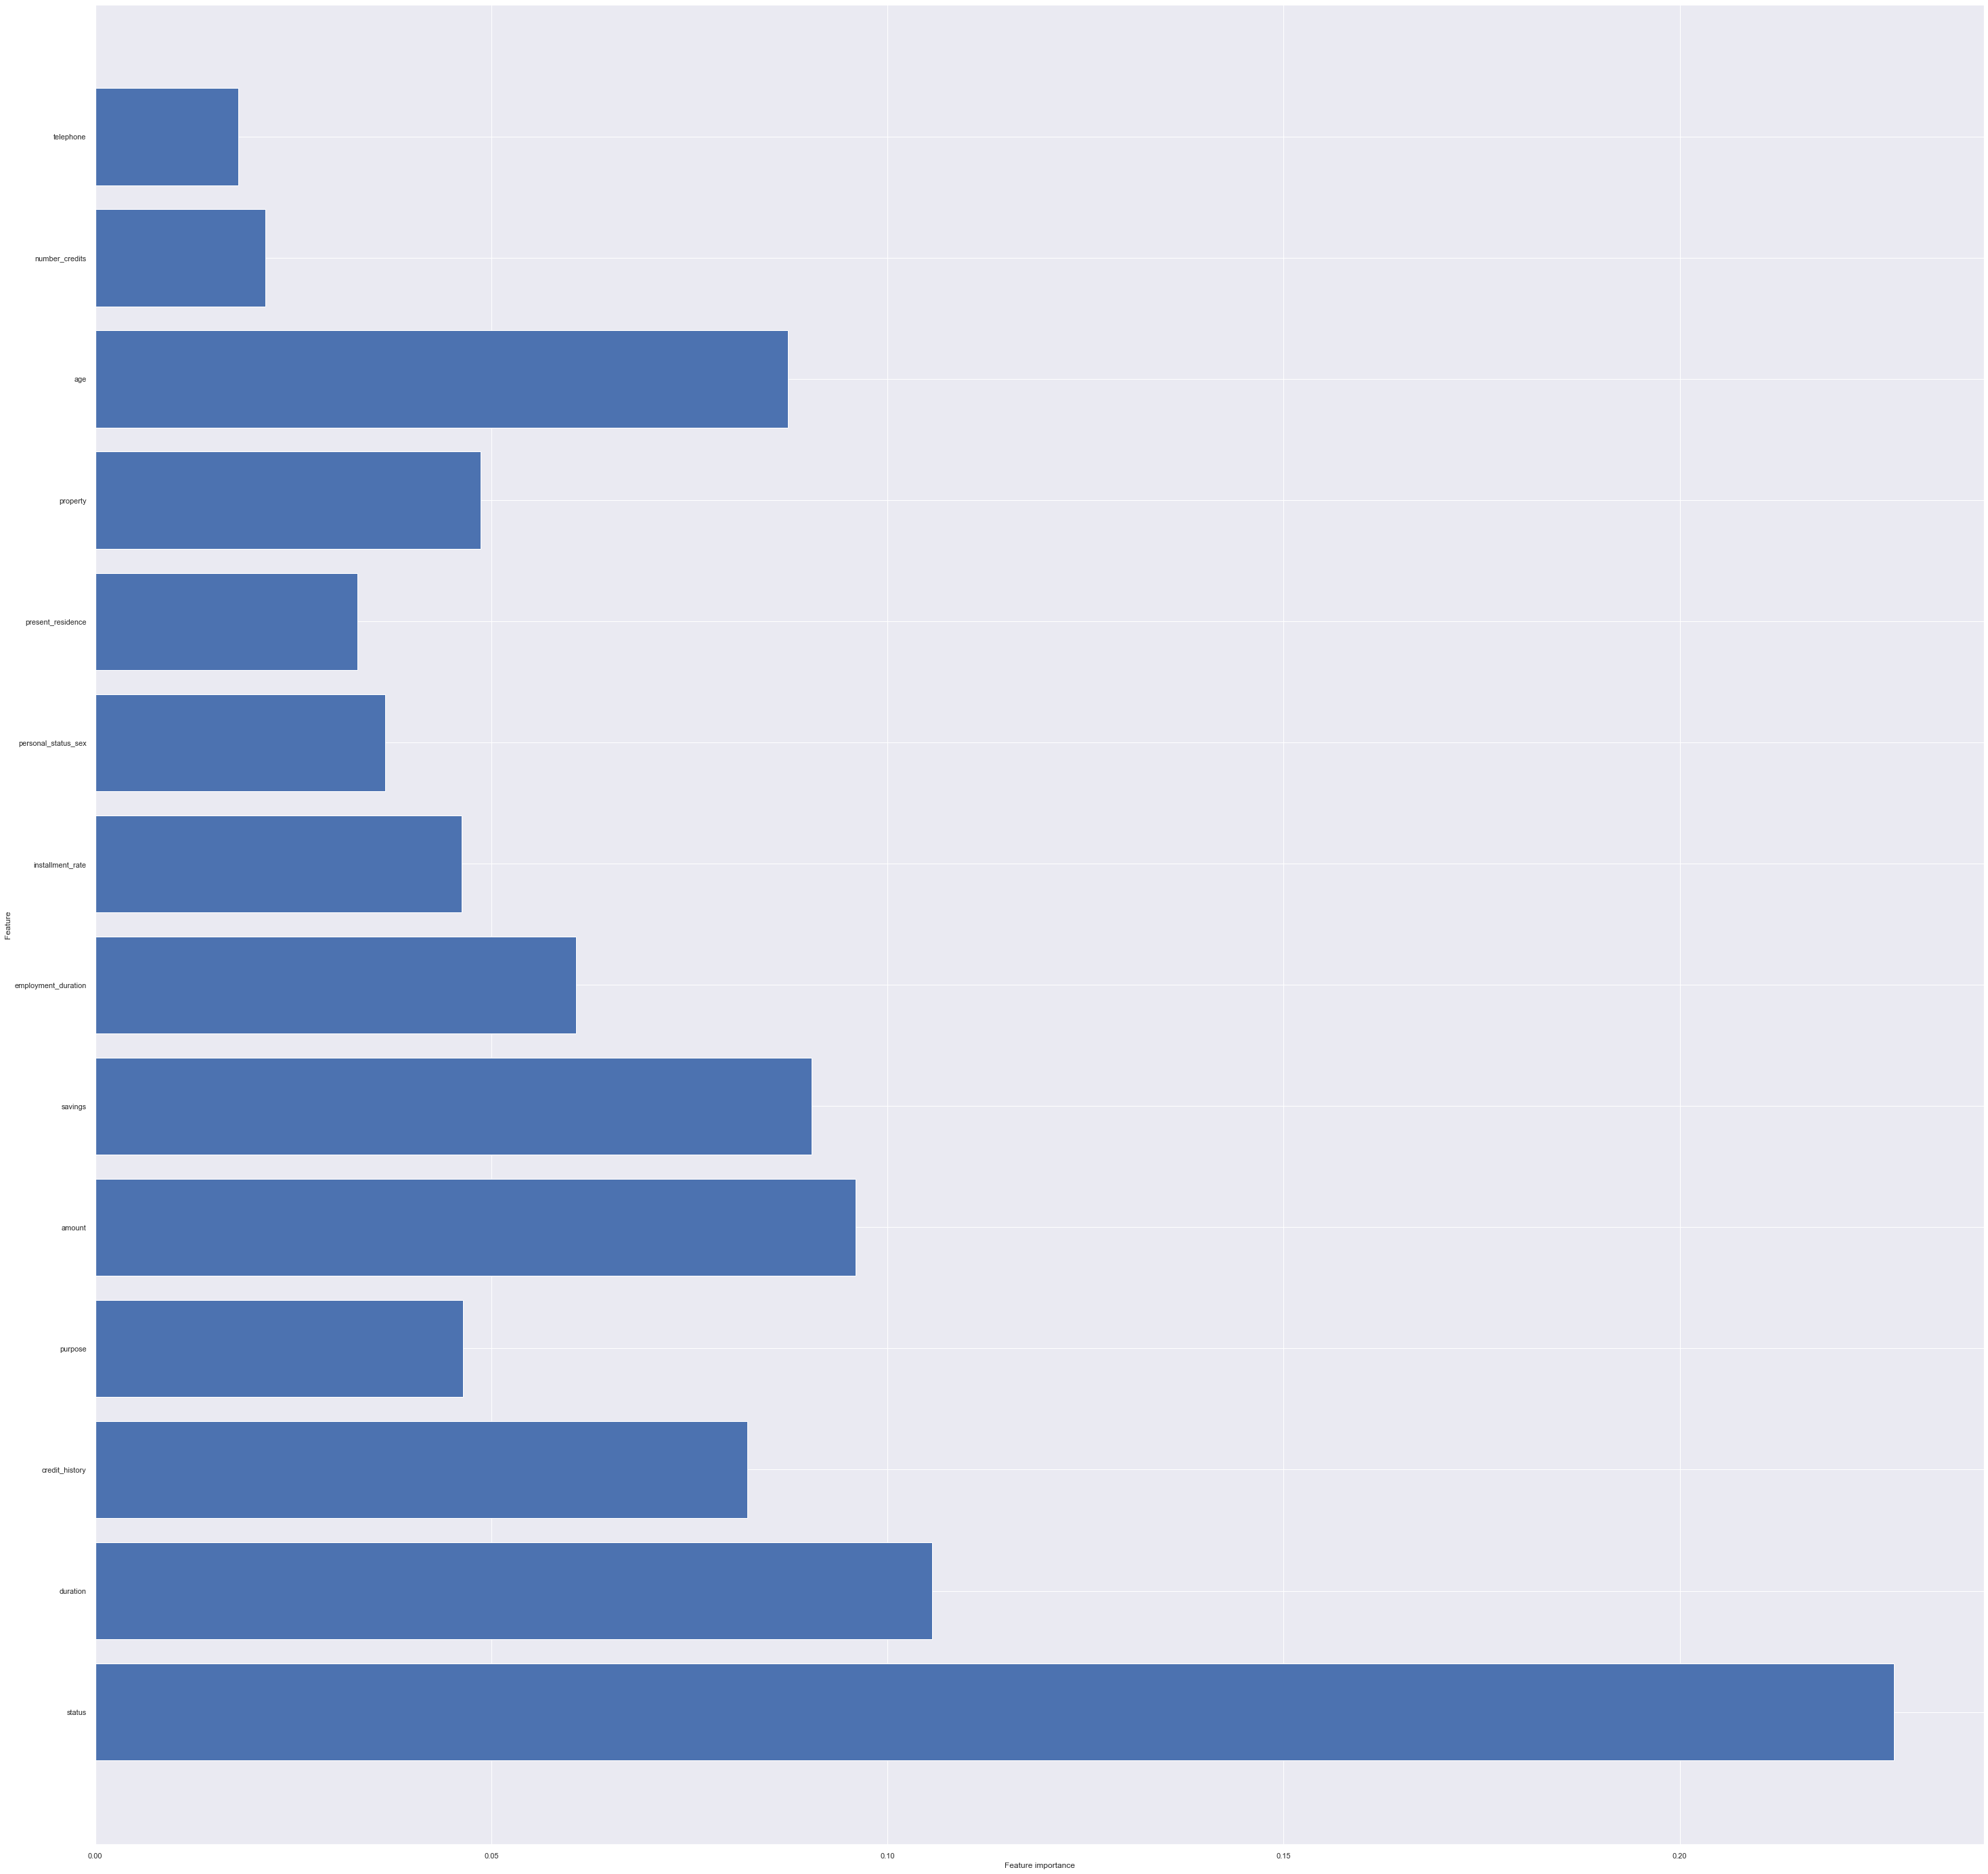

In [89]:
#checking the feature improtance in the model
plt.figure(figsize=(50,50))
n_features = X_train.shape[1]
plt.barh(range(n_features), RFClassifier.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# THE END